In [18]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [20]:
train_images[0,23:27,23:27]

train_labels[:10] 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

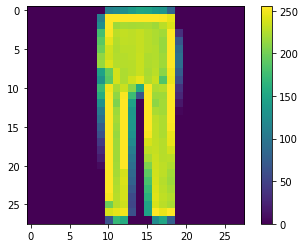

In [22]:
plt.figure()
plt.imshow(train_images[10671])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(64, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(64, activation='relu'),  # hidden layer (3)
    keras.layers.Dense(10, activation='softmax') # output layer (4)
])

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3774 - acc: 0.8638
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3454 - acc: 0.8726
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3224 - acc: 0.8815
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3062 - acc: 0.8873
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2909 - acc: 0.8917


In [69]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3423 - acc: 0.8787
Test accuracy: 0.8787


In [70]:
predictions = model.predict(test_images)

In [71]:
predictions[4567]

array([6.3447416e-08, 1.3063822e-09, 8.0363503e-09, 7.0394307e-08,
       2.6873117e-08, 6.9631278e-06, 2.3015902e-07, 7.8771875e-04,
       1.2417309e-05, 9.9919254e-01], dtype=float32)

Shirt


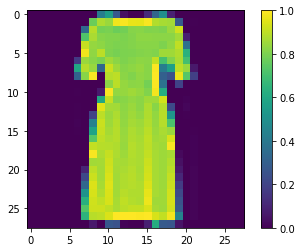

In [91]:
n = 4365
print(class_names[(np.argmax(predictions[n]))])
plt.figure()
plt.imshow(train_images[n])
plt.colorbar()
plt.grid(False)
plt.show()